## CS 613 Natural Language Proceessing - Assignment 1

Understanding TTR and Power Laws from the Tweets Dataset

### Import libraries and data

In [1]:
import numpy as np                                       # For array level operations
from nltk.tokenize import TweetTokenizer                 # For tokenizing the tweets
import csv                                               # For reading dataset
from matplotlib import pyplot as plt                     # For generating plots
%matplotlib inline

In [2]:
with open('./tweets-dataset.csv','r')as file:
    datum = csv.reader(file)
    data = ""                                             # Read file translated into string
    for row in datum:
        if row == ['Sentence']:                           # Column heading needs to be ignored
            continue
        data = data + "\n" + row[0]
    data = data[2:]                                       # Removing the "\n" added in beginning

### 1. Finding TTR for given corpus

Tokens are all individually existing words. Types represents collection of unique words only. <br>
TTR = no. of types / no. of tokens

In [3]:
tknzr = TweetTokenizer()                                  # Currently using NLTK's twwet tokenizer
                                                          # Others such as nltk.tokenize() can also be used
tokens = tknzr.tokenize(data)                         
print("Number of tokens: ",len(tokens))

Number of tokens:  367775


In [4]:
types = sorted(set(tokens))                               # Sort all tokens to get number of unique words
print("Number of types: ",len(types))

Number of types:  49127


In [5]:
TTR = len(types)/len(tokens)
print("The Type-Token Ratio of our dataset is:",TTR)

The Type-Token Ratio of our dataset is: 0.1335789545238257


### 2. Verification of Zipf's Law

We find the frequencies of tokens (f) and then sort them in reverse order to get rank (r).<br>
We wish to verify that f is inversely proportional to r. <br>
This is equivalent to showing \begin{equation}log(f) + log(r) = log(k)\end{equation}

In [6]:
from nltk import FreqDist            # For frequenct distribution

In [7]:
p = FreqDist(tokens)                 # Finding frequency distribution of the tokens found above
freq = list(p.values())

freq.sort(reverse=True)              # Sort freq reverse to get ranked values

f = np.array(freq)
r = np.arange(1, len(f)+1)

In [8]:
k = f*r                              # Multiply frequency and rank to get k for each word 
print(k[:25])

[ 9717 19394 21234 18900 21010 24048 25053 24704 27531 30250 31570 34416
 36712 38976 37995 36416 37349 38844 40508 37060 37044 38104 37536 37776
 39050]


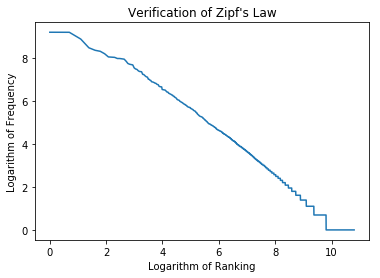

In [9]:
plt.plot(np.log(r),np.log(f))
plt.xlabel('Logarithm of Ranking')
plt.ylabel('Logarithm of Frequency')
plt.title("Verification of Zipf's Law")
plt.savefig('Zipf.jpg')
plt.show()

In [10]:
print("For the first 25 values,")
print("The average value of k is:",np.mean(k[:25]))
print("It varies with standard deviation:", np.std(k[:25]))
print("Therefore Zipf's Law is valid")

For the first 25 values,
The average value of k is: 31247.88
It varies with standard deviation: 8293.47777628
Therefore Zipf's Law is valid


### 3. Plotting Heap's Law

We want the V = kN<sup>b</sup>. This translates to log(V) = k log(N) + b. <br>
This means that log(V) and log(N) have linear nature and their slope gives k, intercept gives us b

In [11]:
unique = []

words = []
vocab = []

curr_word = 0
curr_uniq = 0

In [12]:
for token in tokens:
    curr_word = curr_word + 1
    if token not in unique:
        unique.append(token)
        curr_uniq = curr_uniq + 1
        
    vocab.append(curr_uniq)
    words.append(curr_word)

In [13]:
V = np.array(vocab)
N = np.array(words)

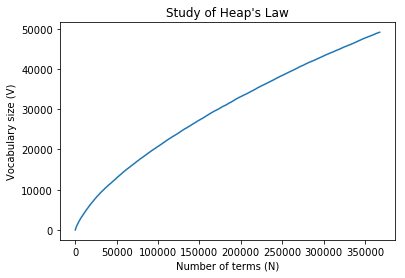

In [14]:
plt.plot(N, V)
plt.xlabel('Number of terms (N)')
plt.ylabel('Vocabulary size (V)')
plt.title("Study of Heap's Law")
plt.savefig('Heap-1.jpg')
plt.show()

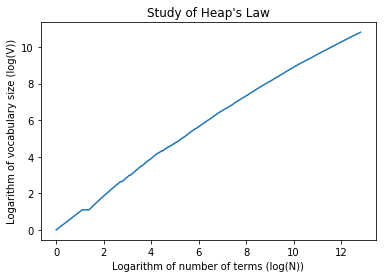

In [15]:
plt.plot(np.log(N),np.log(V))
plt.xlabel('Logarithm of number of terms (log(N))')
plt.ylabel('Logarithm of vocabulary size (log(V))')
plt.title("Study of Heap's Law")
plt.savefig('Heap-2.jpg')
plt.show()

In [16]:
# Using Least Squares Method, the above line has slope and intercept as follows

n = np.log(N)
v = np.log(V)

k = (((np.mean(n)*np.mean(v)) - np.mean(n*v)) / ((np.mean(n)*np.mean(n)) - np.mean(n*n)))
    
b = np.mean(v) - k*np.mean(n)

In [17]:
print("Value of slope(k) is:",k)
print("Value of exponent(b) is:",b)

Value of slope(k) is: 0.704020345366
Value of exponent(b) is: 1.81432066992
